In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df= pd.read_csv('ingredients.csv')
df

,sweetness,crunchiness,ingredients,class
0,1,1,cheese,protein
1,3,1,fish,protein
2,2,2,shrimp,protein
3,1,4,bacon,protein
4,3,5,nuts,protein
5,1,9,lettuce,vegetable
6,2,8,cucumber,vegetable
7,3,7,green bean,vegetable
8,5,10,carrot,vegetable
9,3,10,celery,vegetable


In [3]:
import warnings
warnings.filterwarnings('ignore')

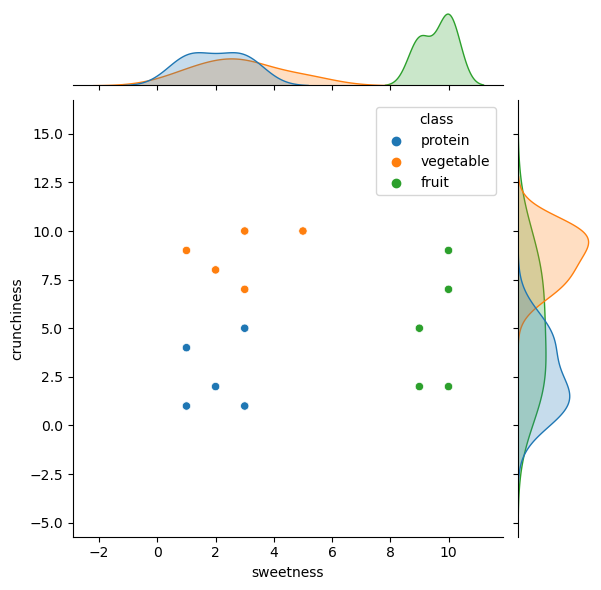

In [10]:
sns.jointplot(x='sweetness',y='crunchiness',data=df,hue='class');

In [4]:
# Seperate ip and op

In [5]:
x= df[['sweetness','crunchiness']]
y=df['class']

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
clf=KNeighborsClassifier(n_neighbors=4)

In [9]:
clf.fit(x,y)

KNeighborsClassifier(n_neighbors=4)

In [11]:
clf.predict([[6,4]])

array(['fruit'], dtype=object)

In [12]:
oc=df['class'].value_counts()

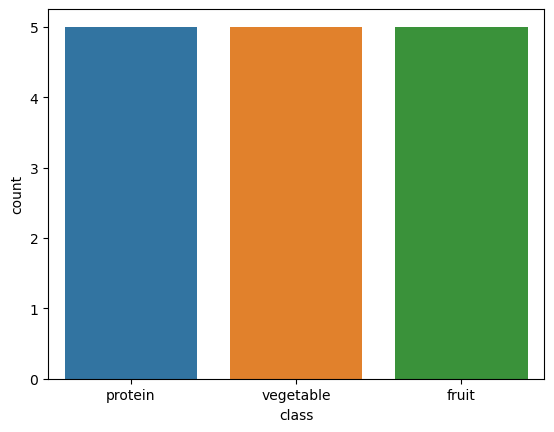

In [13]:
sns.countplot(x=y);

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [16]:
x_train.shape

(11, 2)

In [17]:
y_train.shape

(11,)

In [21]:
error=[]
for n in range(1,12):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(np.mean(y_test !=  y_pred))

In [22]:
error

[0.0, 0.0, 0.0, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0]

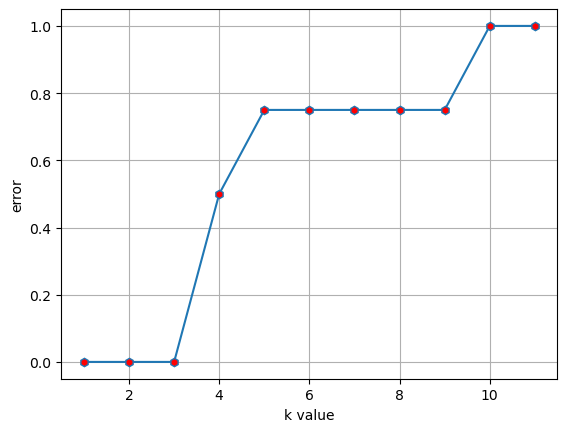

In [25]:
plt.xlabel('k value')
plt.ylabel('error')
plt.plot(range(1,12),error,marker='h',mfc='red')
plt.grid();